# 02 - Limpieza y Análisis Exploratorio
Este notebook realiza la limpieza y transformación de datos.

In [11]:

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde la carpeta data/raw
data_path = '../data/raw/Housing.csv'
housing_df = pd.read_csv(data_path)

# Obtain basic statistics and info for each column in the dataset
housing_stats = housing_df.describe()
housing_info = housing_df.info()

housing_info

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### DESCRIPCION
- id: Identificador único de la propiedad.
- date: Fecha de listado de la propiedad.
- price: Precio de la propiedad (variable objetivo).
- bedrooms: Número de habitaciones.
- bathrooms: Número de baños.
- sqft_living: Área habitable en pies cuadrados.
- sqft_lot: Tamaño total del lote en pies cuadrados.
- floors: Número de pisos.
- waterfront: Vista al agua (1 = sí, 0 = no).
- view: Calidad de la vista (0 a 4).
- condition: Estado general de la propiedad (1 a 5).
- grade: Calidad de construcción y diseño (1 a 13).
- sqft_above: Área sobre el nivel del suelo en pies cuadrados.
- sqft_basement: Área del sótano en pies cuadrados.
- yr_built: Año de construcción.
- yr_renovated: Año de la última renovación.
- zipcode: Código postal de la ubicación.
- lat: Coordenadas geográficas de latitud de la propiedad.
- long: Coordenadas geográficas de longitud la propiedad.
- sqft_living15: Promedio del área habitable de las 15 propiedades más cercanas.
- sqft_lot15: Promedio del tamaño del lote de las 15 propiedades más cercanas

In [2]:
housing_stats

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
 # Convertir la columna 'date' a den formato datetime
housing_df['date'] = pd.to_datetime(housing_df['date'], errors='coerce')

# Recalculate the correlation matrix without the 'date' column
correlation_matrix_cleaned = housing_df.drop(columns=['date']).corr(numeric_only=True)



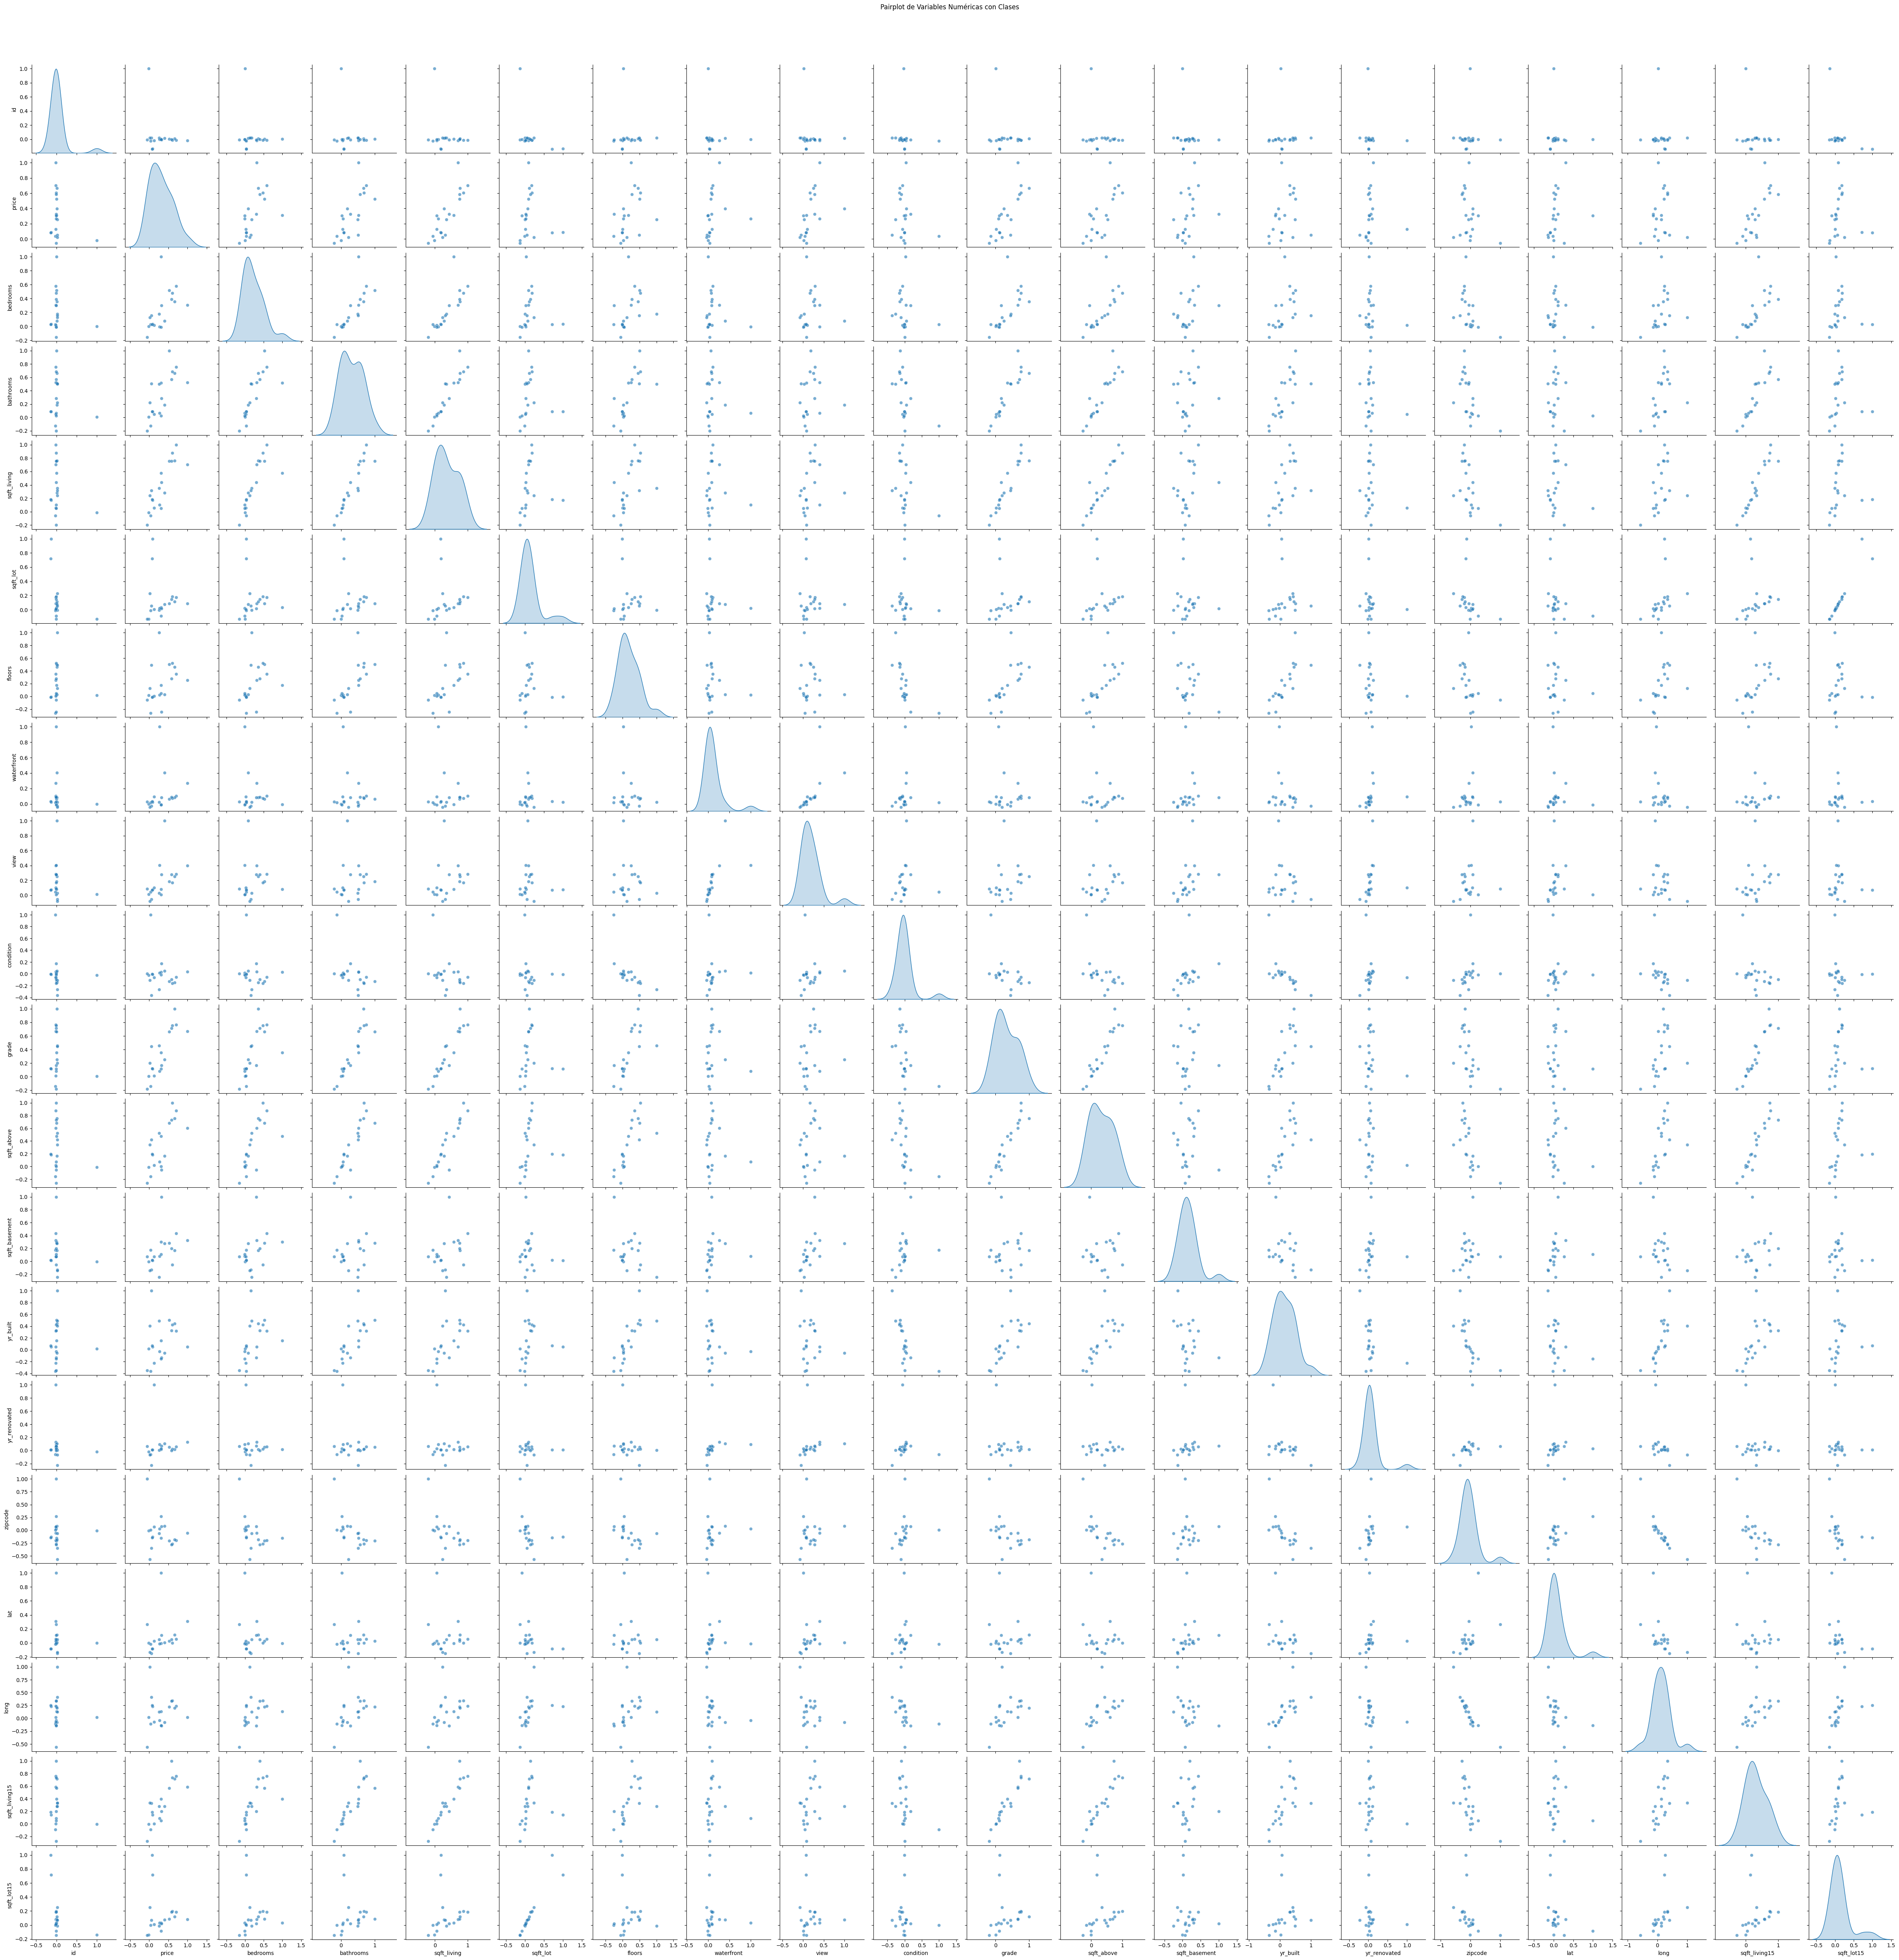

In [10]:
# Graficos
sns.pairplot(correlation_matrix_cleaned, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot de Variables Numéricas con Clases", y=1.02)
plt.show()


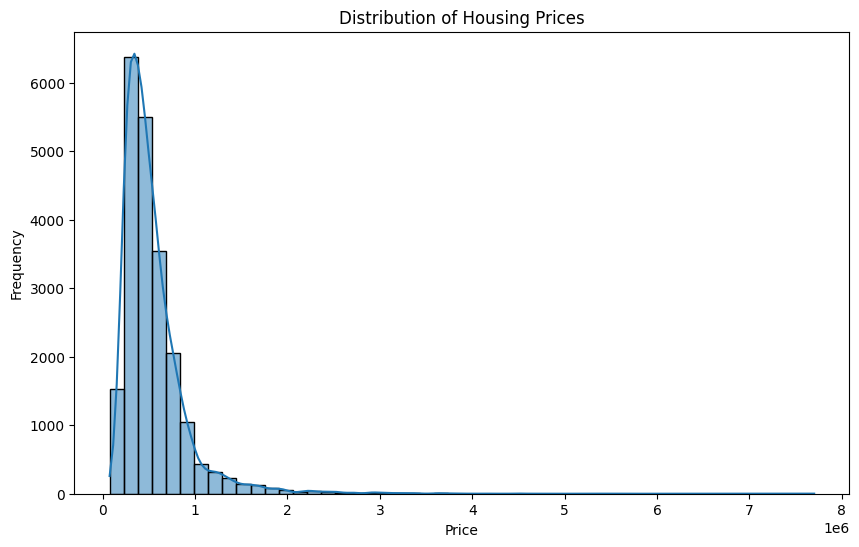

In [12]:



# Plot the distribution of the 'price' variable
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['price'], bins=50, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


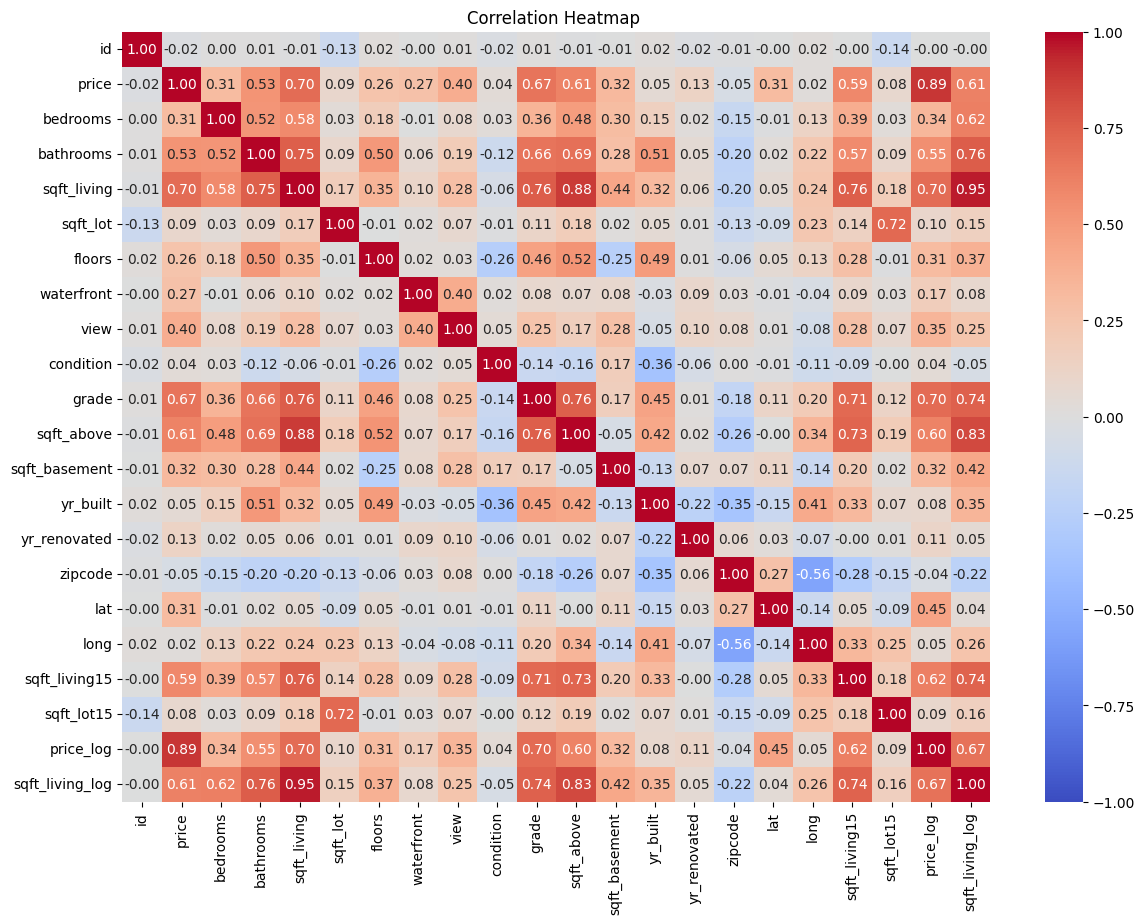

In [25]:
# Display the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap ")
plt.show()

In [18]:
housing_df_cleaned = housing_df.copy()
# Crear nueva característica 'property_age'
current_year = 2015
housing_df_cleaned['property_age'] = current_year - housing_df_cleaned[['yr_built', 'yr_renovated']].max(axis=1)

# Aplicar transformaciones logarítmicas para reducir asimetría en ciertas variables
housing_df['price_log'] = np.log1p(housing_df['price'])
housing_df['sqft_living_log'] = np.log1p(housing_df['sqft_living'])

# Eliminamos columnas poco relacionadas
housing_df_cleaned = housing_df_cleaned.drop(columns=['id', 'zipcode','date','lat','long','yr_renovated','yr_built','waterfront','condition','sqft_living','price'])


In [30]:


# Eliminar valores atípicos extremos en 'sqft_lot' según un umbral (por ejemplo, valores por encima del percentil 99)
umbral_sqft_lot = housing_df_cleaned['sqft_lot'].quantile(0.99)
housing_df_cleaned = housing_df_cleaned[housing_df_cleaned['sqft_lot'] <= umbral_sqft_lot]

# Verificar la forma del dataset limpio y la distribución de las variables transformadas
housing_df_cleaned


,bedrooms,bathrooms,sqft_lot,floors,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price_log,sqft_living_log,property_age
0,2,1.00,5650,1.0,0,7,1180,0,1340,5650,12.351475,7.074117,60
1,3,2.25,7242,2.0,0,7,2170,400,1690,7639,13.195616,7.852050,24
2,2,1.00,10000,1.0,0,6,770,0,2720,8062,12.100718,6.647688,82
3,4,3.00,5000,1.0,0,7,1050,910,1360,5000,13.311331,7.581210,50
4,3,2.00,8080,1.0,0,8,1680,0,1800,7503,13.142168,7.427144,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1131,3.0,0,8,1530,0,1530,1509,12.793862,7.333676,6
21609,4,2.50,5813,2.0,0,8,2310,0,1830,7200,12.899222,7.745436,1
21610,2,0.75,1350,2.0,0,7,1020,0,1020,2007,12.904461,6.928538,6
21611,3,2.50,2388,2.0,0,8,1600,0,1410,1287,12.899222,7.378384,11


In [1]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Pablo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


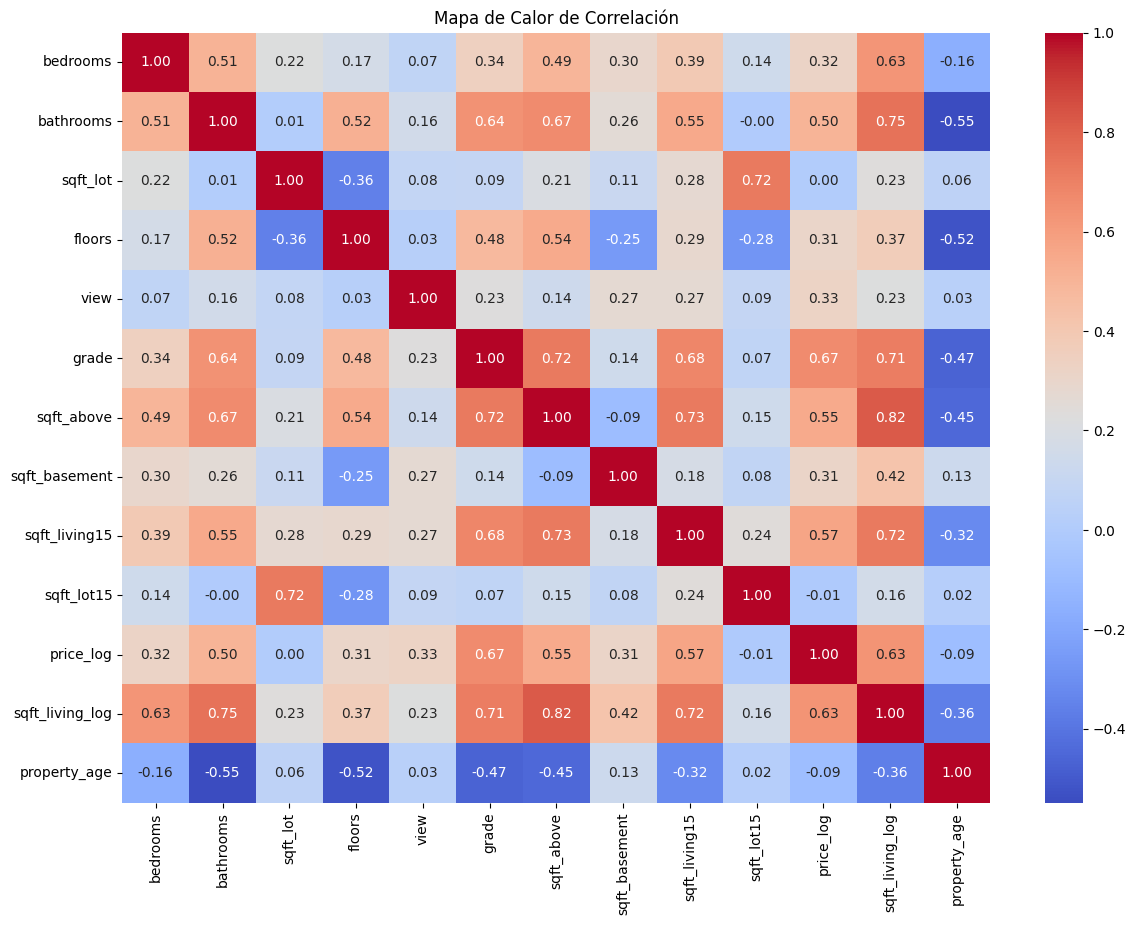

In [31]:

# Visualizar mapa de calor de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(housing_df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()
    